In [1]:


# Load the SDK
%matplotlib inline
from lyft_dataset_sdk.lyftdataset import LyftDataset
dataPath = '/home/itiv/Desktop/lyft-dataset'


# Load the dataset
# Adjust the dataroot parameter below to point to your local dataset path.
# The correct dataset path contains at least the following four folders (or similar): images, lidar, maps, v1.0.1-train
level5data = LyftDataset(data_path=dataPath, json_path=dataPath+'/v1.02-train', verbose=True)



9 category,
18 attribute,
4 visibility,
15991 instance,
8 sensor,
128 calibrated_sensor,
149072 ego_pose,
148 log,
148 scene,
18634 sample,
149072 sample_data,
539765 sample_annotation,
1 map,
Done loading in 6.6 seconds.
Reverse indexing ...
Done reverse indexing in 1.8 seconds.


In [4]:
### load track result dict
import json
import pandas as pd
from pyquaternion import Quaternion
## look for scene with sample_token: 07889e50d51717e829cbcb4800e6cb2ce08bdabe92440c6708131c8f9059d21d
#sample_token = '07889e50d51717e829cbcb4800e6cb2ce08bdabe92440c6708131c8f9059d21d'





with open('/home/itiv/Desktop/lyft-kaggle-dataset/train/tracking_resultsaf749b4da1ab470bd4af7bab1a1e9ea358349839844de30291ec3c1c15f94f48.json') as json_file:
    data = json.load(json_file)

print(data['results'])

sample = level5data.get('sample', sample_token)
scene_token = sample['scene_token']
scene = level5data.get('scene', scene_token)


#print(scene    
#for frame in data['results']:
#    print(frame)
#    print('--')

counter = 0

tracking_ids = []
sample_token = scene['first_sample_token']
for index in range(scene['nbr_samples']):
    sample = level5data.get('sample', sample_token)
    for detection_dict in data['results'][sample_token]:
        if not int(detection_dict['tracking_id']) in tracking_ids:
            tracking_ids.append(int(detection_dict['tracking_id']))
        else:
            counter += 1
    sample_token = sample['next']
    if sample_token is '':
        break

tracking_ids.sort()            
print(tracking_ids)


{'779fb76f1b70ff92cf586bf2ed5f8ac0e9cf5c28fde2c33760cd3219840e529d': [{'sample_token': '779fb76f1b70ff92cf586bf2ed5f8ac0e9cf5c28fde2c33760cd3219840e529d', 'translation': [1861.298099395629, 1226.5530018755062, -18.075822357890658], 'size': [1.8343555927276611, 4.489137649536133, 1.6975687742233276], 'rotation': [0.9453472730939056, -0.0, -0.0, -0.32606522852631287], 'velocity': [0, 0], 'tracking_id': '3', 'tracking_name': 'car', 'tracking_score': 0.23309940099716187}, {'sample_token': '779fb76f1b70ff92cf586bf2ed5f8ac0e9cf5c28fde2c33760cd3219840e529d', 'translation': [1846.2692977814745, 1213.513830429862, -18.509328059085647], 'size': [1.9102023839950562, 4.655706405639648, 1.6997615098953247], 'rotation': [0.31617365533834724, 0.0, 0.0, 0.9487013332287396], 'velocity': [0, 0], 'tracking_id': '2', 'tracking_name': 'car', 'tracking_score': 0.5670858025550842}, {'sample_token': '779fb76f1b70ff92cf586bf2ed5f8ac0e9cf5c28fde2c33760cd3219840e529d', 'translation': [1864.4965009474242, 1207.37

NameError: name 'sample_token' is not defined

In [47]:
sample_token = scene['first_sample_token']
sample = level5data.get('sample', sample_token)
sample_data = level5data.get('sample_data', sample['data']['LIDAR_TOP'])
ego_pose = level5data.get('ego_pose', sample_data['ego_pose_token'])
print(ego_pose)

{'rotation': [0.9618380440174924, 0.015373615240629754, -0.007273475666257778, -0.27309032496002045], 'timestamp': 1546637660301188.8, 'translation': [1971.197119059927, 1119.5842977891193, -19.288481582765968], 'token': 'c49194c20f3dbea9309240c46df14d7d97c2d469dfc625995cdbec57de4d975d'}


In [64]:
import numpy as np

index = range(scene['nbr_samples'])
columns = ["Car "+str(x) for x in tracking_ids]
#columns.append('Timestamp')


traffic_coords = pd.DataFrame(index=index, columns=columns)
traffic_coords = traffic_coords.astype(object)

traffic_orientation = pd.DataFrame(index=index, columns=columns)
traffic_orientation = traffic_orientation.astype(object)

traffic_sizes = pd.DataFrame(index=index, columns=columns)
traffic_sizes = traffic_sizes.astype(object)

columns = ['Timestamp','Translation','Yaw']
ego_info = pd.DataFrame(index=index, columns=columns)
ego_info = ego_info.astype(object)



sample_token = scene['first_sample_token']
for index in range(scene['nbr_samples']):
    sample = level5data.get('sample', sample_token)
    sample_data = level5data.get('sample_data', sample['data']['LIDAR_TOP'])
    ego_pose = level5data.get('ego_pose', sample_data['ego_pose_token'])
    for detection_dict in data['results'][sample_token]:
        traffic_coords.at[index, 'Car '+detection_dict['tracking_id']] = detection_dict['translation']
        traffic_orientation.at[index, 'Car '+detection_dict['tracking_id']] = Quaternion(detection_dict['rotation']).yaw_pitch_roll[0]
        traffic_sizes.at[index, 'Car '+detection_dict['tracking_id']] = detection_dict['size']
        
    #get ego information here.....
    ego_info.at[index, 'Timestamp'] = ego_pose['timestamp']
    ego_info.at[index, 'Yaw'] = Quaternion(ego_pose['rotation']).yaw_pitch_roll[0]
    ego_info.at[index, 'Translation'] = ego_pose['translation']
        
        
    sample_token = sample['next']
    if sample_token is '':
        print('end reached')
        break

        
        

        
        
#ego_vel = detection_oxts.iloc[ : , 8 ]
#for index, row in detection_data.iterrows():
#    T_pose = pose_mat[row['FrameID']]
#    point = np.array([row['Loc-x'],row['Loc-y'],row['Loc-z'],1])
#    point = T_pose.dot(point)    
#    traffic_coords.at[row['FrameID'], 'Car '+str(row['ObjectID'])] = point.tolist()



for index,entrys in traffic_coords.count().iteritems():
    if entrys < 5:
        traffic_coords.drop(index,axis=1,inplace=True)


print(np.array(ego_info['Translation'].tolist())[:,0])






end reached
[1971.19711906 1973.4774272  1975.78965625 1978.12429783 1980.42717603
 1982.73305578 1985.05570959 1987.38579759 1989.71840601 1992.04742549
 1994.38434815 1996.7054792  1999.01283529 2001.34793862 2003.74759427
 2006.13724406 2008.47925173 2010.82406    2013.16843723 2015.49017593
 2017.82523265 2020.21217282 2022.56820072 2024.88957692 2027.19059059
 2029.49239363 2031.7989126  2034.12437005 2036.43859308 2038.77420094
 2041.0646565  2043.3666419  2045.6849917  2048.05623764 2050.35866776
 2052.62458857 2054.86568091 2057.08828798 2059.38135591 2061.64001579
 2063.86951315 2066.07034242 2068.25797832 2070.46170551 2072.67879483
 2074.91992743 2077.15727677 2079.39258585 2081.60841739 2083.83114162
 2086.07036631 2088.34200766 2090.648688   2092.87304508 2095.1087379
 2097.37848414 2099.64883482 2101.93405533 2104.20170017 2106.48147349
 2108.73787002 2111.00205568 2113.26234754 2115.53116712 2117.86339082
 2120.17738547 2122.45265882 2124.73502916 2127.01840253 2129.2998

<IPython.core.display.Javascript object>


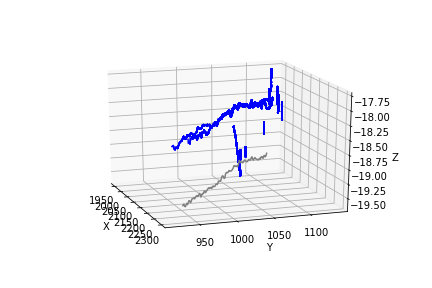

In [65]:
#plot results

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection="3d")


x_line = np.array(ego_info['Translation'].tolist())[:,0]
y_line = np.array(ego_info['Translation'].tolist())[:,1]
z_line = np.array(ego_info['Translation'].tolist())[:,2]


#x_line2 = ego_coords2[:,0]
#y_line2 = ego_coords2[:,1]
#z_line2 = ego_coords2[:,2]


#print('0-Range:'+str(min(ego_coords2[:,0]))+" - "+str(max(ego_coords2[:,0])))
#print('1-Range:'+str(min(ego_coords2[:,1]))+" - "+str(max(ego_coords2[:,1])))
#print('2-Range:'+str(min(ego_coords2[:,2]))+" - "+str(max(ego_coords2[:,2])))



counter = 0

for column in traffic_coords:
    counter += 1
    if counter > 10:
        break
    car = traffic_coords[column]
    x_traff = []
    y_traff = []
    z_traff = []
    for index in range(len(car)):
        if type(car[index]) is list:
            x_traff.append(car[index][0])
            y_traff.append(car[index][1])
            z_traff.append(car[index][2])
        ax.plot3D(x_traff, y_traff, z_traff, 'blue')
        
        
        


ax.plot3D(x_line,y_line,z_line, 'gray')
#ax.plot3D(x_line2,y_line2,z_line2, 'green')


# make labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.auto_scale_xyz([-800, 0], [-800 ,0], [-100, 100])

plt.show()


In [10]:
#filter short occurence traffic


for index,entrys in traffic_coords.count().iteritems():
    if entrys < 5:
        traffic_coords.drop(index,axis=1,inplace=True)
        
        
#append rotation rz to data

#at least 2 rows in row!
## calculates traffic yaw angle....TODO extrackt from track result...
for col_index,col in enumerate(traffic_coords):
    car_col = traffic_coords[col]
    for index,coords in car_col.items(): 
        if type(coords) is list and len(traffic_coords.index) > index+1 and type(car_col[index+1]) is list:
            dx=coords[0]-car_col[index+1][0]
            dy=coords[1]-car_col[index+1][1]
            rz = math.atan2(dy, dx)-np.pi
            traffic_coords.at[index, col].extend([rz])
        elif type(coords) is list:
            traffic_coords.at[index, col].extend([rz])     
        
        

        
ego_coords = np.append(ego_coords, np.array(ego_yaw).reshape(-1, 1), axis=1)
print(ego_coords)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.10850033e+00]
 [-1.01375859e-04  3.53774987e-04  1.32751465e-03  1.10850533e+00]
 [-3.79465055e-05  1.19824475e-03  3.36456299e-03  1.10856433e+00]
 ...
 [ 7.27916871e+02  4.84463135e+02  1.97522812e+01 -1.21587967e+00]
 [ 7.28215139e+02  4.83630289e+02  1.98206558e+01 -1.19032067e+00]
 [ 7.28536457e+02  4.82806185e+02  1.98936386e+01 -1.16479067e+00]]


In [11]:
CM_PROJECT_DIR = 'C://CM_Projects//maneuver_simu'
TESTRUN_DIR = CM_PROJECT_DIR+'//Data//TestRun'
SIMINPUT_DIR = CM_PROJECT_DIR+'//SimInput'

TESTRUN_ID=scene_num
TESTRUN_NAME = TESTRUN_DIR+'//testrun_%d'%TESTRUN_ID
TRAFFIC_PROFILE_NAME = SIMINPUT_DIR+'//traffic_profile_%d.txt'%TESTRUN_ID
EGO_PROFILE_NAME = SIMINPUT_DIR+'//ego_profile_%d.txt'%TESTRUN_ID


content_lines = []
content_lines.append('#INFOFILE1.1 - Do not remove this line!\n\
FileIdent = CarMaker-TestRun 8\n\
FileCreator = CarMaker 8.1 2019-11-07\n\
Description:\n\
Vehicle = UserVehicle_MyCar\n\
Trailer =\n\
Tire.0 =\n\
Tire.1 =\n\
Tire.2 =\n\
Tire.3 =\n\
Snapshot.TimeLimit =\n\
Snapshot.DistLimit =\n\
VehicleLoad.0.mass = 0\n\
VehicleLoad.0.pos = 0 0 0\n\
VehicleLoad.1.mass = 0\n\
VehicleLoad.1.pos = 0 0 0\n\
VehicleLoad.2.mass = 0\n\
VehicleLoad.2.pos = 0 0 0\n\
VehicleLoad.3.mass = 0\n\
VehicleLoad.3.pos = 0 0 0\n\
TrailerLoad.0.mass = 0\n\
TrailerLoad.0.pos = 0 0 0\n\
TrailerLoad.1.mass = 0\n\
TrailerLoad.1.pos = 0 0 0\n\
TrailerLoad.2.mass = 0\n\
TrailerLoad.2.pos = 0 0 0\n')
                     
#ego maneuver for every 10th coord

time_between_records = 0.1 

start_vel = ego_vel[0]
man_counter = 1
#ego_man = []
#for vel in ego_vel[::10]:
#    ego_man.append('DrivMan.'+str(man_counter)+'.TimeLimit = '+str(10*time_between_records)+'\n\
#DrivMan.'+str(man_counter)+'.LongDyn = VelControl '+str(vel*3.6)+' 0.0 1.0 0 1 0\n\
#DrivMan.'+str(man_counter)+'.LatDyn = Driver 0\n')
#    man_counter += 1
    
       # +str(start_vel)+
content_lines.append('DrivMan.Init.Velocity = 0\n\
DrivMan.Init.SteerAng = 0\n\
DrivMan.Init.GearNo = 0\n\
DrivMan.Init.LaneOffset = 0\n\
DrivMan.Init.OperatorActive = 1\n\
DrivMan.Init.OperatorState = drive\n\
DrivMan.VhclOperator.Kind = IPGOperator 1\n\
DrivMan.nDMan = '+str(man_counter)+'\n')

content_lines.append('DrivMan.0.TimeLimit = '+str(time_between_records*(len(ego_coords)-1))+'\n\
DrivMan.0.LongDyn = Stop 2.0 0\n\
DrivMan.0.LatDyn = Driver 0\n')


#for line in ego_man:
#    content_lines.append(line)
    
    
#write traffic profile file

traffic_profile = []
traffic_profile.append('# Time')
for index,col in enumerate(traffic_coords):
    traffic_profile.append(' FM_tx_%d FM_ty_%d FM_tz_%d FM_rz_%d' % (index,index,index,index))
traffic_profile.append('\n')    


prev_row = None
for time_index, row in traffic_coords.iterrows():
    traffic_profile.append('%f'%(time_index*time_between_records))
    
    for car_index,coords in enumerate(row): 
        if type(coords) is list:
            traffic_profile.append(' %f %f %f %f'%(coords[0],coords[1],1,coords[4]))
        else:
            traffic_profile.append(' %f %f %f %f'%(0,0,-100,0))
    
    prev_row = row
    traffic_profile.append('\n') 
    

    
with open(TRAFFIC_PROFILE_NAME, 'w') as f:
    for item in traffic_profile:
        f.write("%s" % item)


traffic_counter = 0   
traffic_counter = len(traffic_coords.columns)
content_lines.append('Traffic.IFF.FName = '+TRAFFIC_PROFILE_NAME+'\n\
Traffic.IFF.Time.Name = Time\n\
Traffic.N = %d\n\
Traffic.SpeedUnit = ms\n'%traffic_counter)
    

for index,col in enumerate(traffic_coords):    
    content_lines.append('Traffic.'+str(index)+'.ObjectKind = Movable\n\
Traffic.'+str(index)+'.ObjectClass = Car\n\
Traffic.'+str(index)+'.Name = T'+str(index)+'\n\
Traffic.'+str(index)+'.Info = UNNAMED Object '+str(index)+'\n\
Traffic.'+str(index)+'.Movie.Geometry = 3D/Vehicles/VW_Beetle_2012_Blue.mobj\n\
Traffic.'+str(index)+'.Color = 1.0 0.0 0.0\n\
Traffic.'+str(index)+'.Basics.Dimension = 4.28 1.82 1.28\n\
Traffic.'+str(index)+'.Basics.Offset = 0.0 0.0\n\
Traffic.'+str(index)+'.Basics.Fr12CoM = 2.15\n\
Traffic.'+str(index)+'.Init.Orientation = 0.0 0.0 0.0\n\
Traffic.'+str(index)+'.RCSClass = RCS_Car\n\
Traffic.'+str(index)+'.DetectMask = 1 1\n\
Traffic.'+str(index)+'.Route = 0 1\n\
Traffic.'+str(index)+'.Init.Road = 18 R2\n\
Traffic.'+str(index)+'.Init.v = 1\n\
Traffic.'+str(index)+'.FreeMotion = 1\n\
Traffic.'+str(index)+'.UpdRate = 200\n\
Traffic.'+str(index)+'.IFF.FM_tx.Name =FM_tx_'+str(index)+'\n\
Traffic.'+str(index)+'.IFF.FM_tx.Factor = 1.0\n\
Traffic.'+str(index)+'.IFF.FM_tx.Offset = 0.0\n\
Traffic.'+str(index)+'.IFF.FM_ty.Name =FM_ty_'+str(index)+'\n\
Traffic.'+str(index)+'.IFF.FM_ty.Factor = 1.0\n\
Traffic.'+str(index)+'.IFF.FM_ty.Offset = 0.0\n\
Traffic.'+str(index)+'.IFF.FM_tz.Name =FM_tz_'+str(index)+'\n\
Traffic.'+str(index)+'.IFF.FM_tz.Factor = 1.0\n\
Traffic.'+str(index)+'.IFF.FM_tz.Offset = 0.0\n\
Traffic.'+str(index)+'.IFF.FM_rx.Name =\n\
Traffic.'+str(index)+'.IFF.FM_rx.Factor = 1.0\n\
Traffic.'+str(index)+'.IFF.FM_rx.Offset = 0.0\n\
Traffic.'+str(index)+'.IFF.FM_ry.Name =\n\
Traffic.'+str(index)+'.IFF.FM_ry.Factor = 1.0\n\
Traffic.'+str(index)+'.IFF.FM_ry.Offset = 0.0\n\
Traffic.'+str(index)+'.IFF.FM_rz.Name =FM_rz_'+str(index)+'\n\
Traffic.'+str(index)+'.IFF.FM_rz.Factor = 1.0\n\
Traffic.'+str(index)+'.IFF.FM_rz.Offset = 0.0\n')

                     
#pointlist start degree
dx = ego_coords[1][0]-ego_coords[0][0]
dy = ego_coords[1][1]-ego_coords[0][1]

startDeg = math.degrees(math.atan2(dy, dx))

#pointlist end vector
dx = ego_coords[-1][0]-ego_coords[-2][0]
dy = ego_coords[-1][1]-ego_coords[-2][1]

content_lines.append('DrivMan.OW.Active = 1\n\
DrivMan.OW.Quantities = Time User1 User2 User3 User4\n\
DrivMan.OW.StartGearNo = 1\n\
DrivMan.OW.StartVelocity =\n\
DrivMan.OW.GasMax = 0.5\n\
DrivMan.OW.RefCh = Time\n\
DrivMan.OW.ConsiderRoadSigns = 0\n\
DrivMan.OW.sRoute.Offset = 0\n\
DrivMan.OW.Time.Name = t[s]\n\
DrivMan.OW.Time.Factor = 1.0\n\
DrivMan.OW.User1.Name = x\n\
DrivMan.OW.User1.Factor = 1.0\n\
DrivMan.OW.User1.Offset = 0.0\n\
DrivMan.OW.User2.Name = y\n\
DrivMan.OW.User2.Factor = 1.0\n\
DrivMan.OW.User2.Offset = 0.0\n\
DrivMan.OW.User3.Name = yaw\n\
DrivMan.OW.User3.Factor = 1.0\n\
DrivMan.OW.User3.Offset = 0.0\n\
DrivMan.OW.User4.Name = -\n\
DrivMan.OW.User4.Factor = 1.0\n\
DrivMan.OW.User4.Offset = 0.0\n\
DrivMan.OW.FName = ego_profile_'+str(TESTRUN_ID)+'.txt\n\
ErrorClass.0.Action = abort\n\
ErrorClass.0.Save = 0\n\
ErrorClass.0.WarningLimit = 3 5\n\
ErrorClass.1.Action = abort\n\
ErrorClass.1.Save = 0\n\
ErrorClass.1.WarningLimit = 3 5\n\
ErrorClass.2.Action = abort\n\
ErrorClass.2.Save = 0\n\
ErrorClass.2.WarningLimit = 3 5\n\
ErrorClass.3.Action = abort\n\
ErrorClass.3.Save = 0\n\
ErrorClass.3.WarningLimit = 3 5\n\
ErrorClass.4.Action = abort\n\
ErrorClass.4.Save = 0\n\
ErrorClass.4.WarningLimit = 3 5\n\
ErrorClass.5.Action = abort\n\
ErrorClass.5.Save = 0\n\
ErrorClass.5.WarningLimit = 3 5\n\
ErrorClass.6.Action = abort\n\
ErrorClass.6.Save = 0\n\
ErrorClass.6.WarningLimit = 10 5\n\
ErrorClass.7.Action = abort\n\
ErrorClass.7.Save = 0\n\
ErrorClass.7.WarningLimit = 3 5\n\
ErrorClass.10.Action = abort\n\
ErrorClass.10.Save = 0\n\
ErrorClass.10.WarningLimit = 3 5\n\
ErrorClass.11.Action = abort\n\
ErrorClass.11.Save = 0\n\
ErrorClass.11.WarningLimit = 3 5\n\
Road.FileIdent = IPGRoad 8.0\n\
Road.LibVersion = 8.1\n\
Road.Country = DEU\n\
Road.nLinks = 1\n\
Road.nJunctions = 0\n\
Road.nObjects = 149\n\
Road.nRoutes = 1\n\
Road.RoadNetworkLength = 595.296984550432\n\
Road.BBox = -19.5668198180623 547.415304391587 -224.837648089968 34.6179698226834 -11 11\n\
Road.Route.0.Length = 595.296984550432\n\
Road.RST.Unit = kmh\n\
Road.RST = 50 100 130 30 70 30 0 -1\n\
Road.Movie = 0.2 1 0.01 1.5 1.5 1 1\n\
Road.PathMode = -1\n\
Road.Link.0.ID = 0\n\
Road.Link.0.Junctions = -1 -1 -2 -1\n\
Road.Link.0.Node0 = 0 0 0 '+str(startDeg)+'\n\
Road.Link.0.RST = countryroad\n\
Road.Link.0.RL.ID = 1\n\
Road.Link.0.Seg.0.ID = 5\n\
Road.Link.0.Seg.0.Type = PointList\n\
Road.Link.0.Seg.0.Param =  '+str(dx)+' '+str(dy)+' 1 0 0 0 0 0\n\
Road.Link.0.Seg.0.PointList:\n')

#append road pointlist
obj_id=5
pointlist = []
pointlist.append('# t[s] x y yaw -\n')
counter = 0
for row in ego_coords[::1]:
    pointlist.append('  %f %f %f %f %f\n'%(counter*time_between_records,row[0],row[1],row[3],0))
    counter += 1

    
with open(EGO_PROFILE_NAME, 'w') as f:
    for item in pointlist:
        f.write("%s" % item)
        
        
pointlist = ''
for row in ego_coords[::1]:
    obj_id +=  1
    pointlist = pointlist + '	'+str(row[0])+' '+str(row[1])+'\n'
    
content_lines.append(pointlist)    
    
content_lines.append('Road.Link.0.LaneSection.0.ID = '+str(obj_id+1)+'\n\
Road.Link.0.LaneSection.0.Start = 0\n\
Road.Link.0.LaneSection.0.LaneL.0.ID = '+str(obj_id+2)+'\n\
Road.Link.0.LaneSection.0.LaneL.0 = 0 3.5 3.5 0 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.0.ARP = '+str(obj_id+5)+' '+str(obj_id+6)+' '+str(obj_id+7)+' '+str(obj_id+8)+' '+str(obj_id+9)+' '+str(obj_id+10)+'\n\
Road.Link.0.LaneSection.0.LaneL.1.ID = '+str(obj_id+13)+'\n\
Road.Link.0.LaneSection.0.LaneL.1 = 0 0.75 0.75 4 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.1.ARP = '+str(obj_id+16)+' '+str(obj_id+17)+' '+str(obj_id+18)+' '+str(obj_id+19)+' '+str(obj_id+20)+' '+str(obj_id+21)+'\n\
Road.Link.0.LaneSection.0.LaneL.2.ID = '+str(obj_id+24)+'\n\
Road.Link.0.LaneSection.0.LaneL.2 = 0 1.5 1.5 4 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.2.ARP = '+str(obj_id+27)+' '+str(obj_id+28)+' '+str(obj_id+29)+' '+str(obj_id+30)+' '+str(obj_id+31)+' '+str(obj_id+32)+'\n\
Road.Link.0.LaneSection.0.LaneL.3.ID = '+str(obj_id+34)+'\n\
Road.Link.0.LaneSection.0.LaneL.3 = 0 1.5 1.5 4 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.3.ARP = '+str(obj_id+37)+' '+str(obj_id+38)+' '+str(obj_id+39)+' '+str(obj_id+40)+' '+str(obj_id+41)+' '+str(obj_id+51)+'\n\
Road.Link.0.LaneSection.0.LaneL.4.ID = '+str(obj_id+44)+'\n\
Road.Link.0.LaneSection.0.LaneL.4 = 0 0.75 0.75 4 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.4.ARP = '+str(obj_id+47)+' '+str(obj_id+48)+' '+str(obj_id+49)+' '+str(obj_id+50)+' '+str(obj_id+51)+' '+str(obj_id+52)+'\n\
Road.Link.0.LaneSection.0.LaneL.5.ID = '+str(obj_id+55)+'\n\
Road.Link.0.LaneSection.0.LaneL.5 = 0 3.5 3.5 0 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.5.ARP = '+str(obj_id+58)+' '+str(obj_id+59)+' '+str(obj_id+60)+' '+str(obj_id+61)+' '+str(obj_id+62)+' '+str(obj_id+63)+'\n\
Road.Link.0.LaneSection.0.LaneL.6.ID = '+str(obj_id+66)+'\n\
Road.Link.0.LaneSection.0.LaneL.6 = 0 3.5 3.5 0 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.6.ARP = '+str(obj_id+69)+' '+str(obj_id+70)+' '+str(obj_id+71)+' '+str(obj_id+72)+' '+str(obj_id+73)+' '+str(obj_id+74)+'\n\
Road.Link.0.LaneSection.0.LaneL.7.ID = '+str(obj_id+77)+'\n\
Road.Link.0.LaneSection.0.LaneL.7 = 0 3.5 3.5 0 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.7.ARP = '+str(obj_id+80)+' '+str(obj_id+81)+' '+str(obj_id+82)+' '+str(obj_id+83)+' '+str(obj_id+84)+' '+str(obj_id+85)+'\n\
Road.Link.0.LaneSection.0.LaneL.8.ID = '+str(obj_id+88)+'\n\
Road.Link.0.LaneSection.0.LaneL.8 = 0 1 1 4 0 0 0\n\
Road.Link.0.LaneSection.0.LaneL.8.ARP = '+str(obj_id+91)+' '+str(obj_id+92)+' '+str(obj_id+93)+' '+str(obj_id+94)+' '+str(obj_id+95)+' '+str(obj_id+96)+'\n\
Road.Link.0.LaneSection.0.LaneL.9.ID = '+str(obj_id+98)+'\n\
Road.Link.0.LaneSection.0.LaneL.9 = 0 2.5 2.5 5 0 0 0\n\
Road.Link.0.LaneSection.0.LaneR.0.ID = '+str(obj_id+101)+'\n\
Road.Link.0.LaneSection.0.LaneR.0 = 0 3.5 3.5 0 0 0 0\n\
Road.Link.0.LaneSection.0.LaneR.0.ARP = '+str(obj_id+104)+' '+str(obj_id+105)+' '+str(obj_id+106)+' '+str(obj_id+107)+' '+str(obj_id+108)+' '+str(obj_id+109)+'\n\
Road.Link.0.LaneSection.0.LaneR.1.ID = '+str(obj_id+112)+'\n\
Road.Link.0.LaneSection.0.LaneR.1 = 0 3.5 3.5 0 0 0 0\n\
Road.Link.0.LaneSection.0.LaneR.1.ARP = '+str(obj_id+115)+' '+str(obj_id+116)+' '+str(obj_id+117)+' '+str(obj_id+118)+' '+str(obj_id+119)+' '+str(obj_id+120)+'\n\
Road.Link.0.LaneSection.0.LaneR.2.ID = '+str(obj_id+123)+'\n\
Road.Link.0.LaneSection.0.LaneR.2 = 0 1 1 4 0 0 0\n\
Road.Link.0.LaneSection.0.LaneR.2.ARP = '+str(obj_id+126)+' '+str(obj_id+127)+' '+str(obj_id+128)+' '+str(obj_id+129)+' '+str(obj_id+130)+' '+str(obj_id+131)+'\n\
Road.Link.0.LaneSection.0.LaneR.3.ID = '+str(obj_id+133)+'\n\
Road.Link.0.LaneSection.0.LaneR.3 = 0 2.5 2.5 5 0 0 0\n\
Road.LanePath.0 = '+str(obj_id+11)+' '+str(obj_id+2)+' 2 10 0.1 0.1\n\
Road.LanePath.1 = '+str(obj_id+22)+' '+str(obj_id+13)+' 0.25 10 0.1 0.1\n\
Road.LanePath.2 = '+str(obj_id+33)+' '+str(obj_id+24)+' 0.25 10 0.1 0.1\n\
Road.LanePath.3 = '+str(obj_id+43)+' '+str(obj_id+34)+' 0.25 10 0.1 0.1\n\
Road.LanePath.4 = '+str(obj_id+53)+' '+str(obj_id+44)+' 0.25 10 0.1 0.1\n\
Road.LanePath.5 = '+str(obj_id+64)+' '+str(obj_id+55)+' 2 10 0.1 0.1\n\
Road.LanePath.6 = '+str(obj_id+75)+' '+str(obj_id+66)+' 2 10 0.1 0.1\n\
Road.LanePath.7 = '+str(obj_id+86)+' '+str(obj_id+77)+' 2 10 0.1 0.1\n\
Road.LanePath.8 = '+str(obj_id+97)+' '+str(obj_id+88)+' 0.25 10 0.1 0.1\n\
Road.LanePath.9 = '+str(obj_id+110)+' '+str(obj_id+101)+' 2 10 0.1 0.1\n\
Road.LanePath.10 = '+str(obj_id+121)+' '+str(obj_id+112)+' 2 10 0.1 0.1\n\
Road.LanePath.11 = '+str(obj_id+132)+' '+str(obj_id+123)+' 0.25 10 0.1 0.1\n\
Route.0.ID = '+str(obj_id+137)+'\n\
Route.0.Name = Route_0\n\
Route.0.DrvPath.ID = '+str(obj_id+138)+'\n\
Route.0.DrvPath:\n\
	'+str(obj_id+110)+'\n\
Road.RL.1.RoadMarking.0.ID = '+str(obj_id+136)+' '+str(obj_id+1)+'\n\
Road.RL.1.RoadMarking.0 = 0 0 0 1 0 0 0.15 0 2 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.0.Material.0 = 1.00,0.00,0.00 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.1.ID = '+str(obj_id+122)+' '+str(obj_id+112)+'\n\
Road.RL.1.RoadMarking.1 = 0 0 0 1 0 -1 0.15 0 1 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.1.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.2.ID = '+str(obj_id+111)+' '+str(obj_id+101)+'\n\
Road.RL.1.RoadMarking.2 = 0 0 0 1 0 -1 0.15 0 2 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.2.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.3.ID = '+str(obj_id+87)+' '+str(obj_id+77)+'\n\
Road.RL.1.RoadMarking.3 = 0 0 0 1 0 1 0.15 0 1 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.3.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.4.ID = '+str(obj_id+76)+' '+str(obj_id+66)+'\n\
Road.RL.1.RoadMarking.4 = 0 0 0 1 0 1 0.15 0 2 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.4.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.5.ID = '+str(obj_id+65)+' '+str(obj_id+55)+'\n\
Road.RL.1.RoadMarking.5 = 0 0 0 1 0 1 0.15 0 2 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.5.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.6.ID = '+str(obj_id+54)+' '+str(obj_id+44)+'\n\
Road.RL.1.RoadMarking.6 = 0 0 0 1 0 1 0.15 0 1 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.6.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.7.ID = '+str(obj_id+23)+' '+str(obj_id+13)+'\n\
Road.RL.1.RoadMarking.7 = 0 0 0 1 0 1 0.15 0 1 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.7.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.RL.1.RoadMarking.8.ID = '+str(obj_id+12)+' '+str(obj_id+2)+'\n\
Road.RL.1.RoadMarking.8 = 0 0 0 1 0 1 0.15 0 1 0 0 2 4 1 1 0 ""\n\
Road.RL.1.RoadMarking.8.Material.0 = 1.0,1.0,1.0 0 0 0 0 0 0 0 0 0 0 0\n\
Road.MaxUsedObjId = '+str(obj_id+150)+'\n\
Road.VhclStartPos = 0 0 0\n\
Road.VhclRoute = Route_0\n\
Road.RouteId = 0\n\
Env.StartTime.Year = 2019\n\
Env.StartTime.Month = 1\n\
Env.StartTime.Day = 1\n\
Env.StartTime.Hour = 12\n\
Env.StartTime.Min = 0\n\
Env.StartTime.Sec = 0\n\
Env.StartTime.DeltaUTC = 0.0\n\
Env.GNav.Active = 0\n\
Env.Temperature = 20.0\n\
Env.AirDensity = 1.205\n\
Env.AirPressure = 1.013\n\
Env.AirHumidity = 60\n\
Env.SolarRadiation = 400.0\n\
Env.RainRate = 0.0\n\
Env.VisRangeInFog = 1000.0\n\
Env.Wind.Kind = none\n\
Env.Wind.Velocity = 0.0\n\
Env.Wind.Angle = 0.0\n\
Env.Sun.Position = geographicDefinition\n\
Env.Sun.Azimuth = 180.0\n\
Env.Sun.Elevation = 45.0\n\
Env.Kind = Generic\n\
Env.Temp.Offset_Elev = -0.0065\n\
Env.Temp.Offset_sRoad.Amplify = 1.0\n\
Env.Temp.Offset_sRoad.On = 0\n\
Env.Temp.Offset_Time.Amplify = 1.0\n\
Env.Temp.Offset_Time.On = 1\n\
Env.Temp.Offset_Time:\n\
	0.0 -2.0\n\
	3.0 -2.5\n\
	6.0 -2.7\n\
	7.5 -2.7\n\
	9.0 -2.5\n\
	10.0 -2.3\n\
	11.0 -1.6\n\
	12.0 0.0\n\
	13.0 1.4\n\
	14.0 2.1\n\
	15.5 2.5\n\
	17.0 2.2\n\
	18.0 1.7\n\
	19.0 1.1\n\
	20.0 0.2\n\
	21.0 -0.6\n\
	22.0 -1.1\n\
	23.0 -1.6\n\
	24.0 -2.0\n\
Driver.ParamIdent = IPGDriver 5\n\
Driver.Mode = std\n\
Driver.Long.DrivMaxSpeed = 0\n\
Driver.Long.CruisingSpeed = 150\n\
Driver.CornerCutCoef = 0.5\n\
Driver.ConsiderTraffic = 1\n\
Driver.Traffic.TimeGapMin = 1.8\n\
Driver.Traffic.TimeGapMax = 5.0\n\
Driver.Traffic.DistMin = 6\n\
Driver.Traffic.DistMax = 250\n\
Driver.Traffic.EcoCoef = 0.75\n\
Driver.Traffic.Overtake = 0\n\
Driver.Traffic.Overtake_Rate = 1\n\
Driver.Traffic.Overtake_dSpeedMin = 10\n\
Driver.Long.dtAccBrake = 0.5\n\
Driver.Long.axMax = 3.0\n\
Driver.Long.axMin = -4.0\n\
Driver.Long.ayMax = 4.0\n\
Driver.Long.GGExp:\n\
	50 1.0 1.0\n\
Driver.Long.DevMax = 0.0\n\
Driver.Long.tReact = 0.0\n\
Driver.Long.TractionControl = 1\n\
Driver.DecShift.UseBrakePark = 0\n\
Driver.DecShift.tSwitchGear = 1.0\n\
Driver.DecShift.nEngine.Limits:\n\
	1500 4000\n\
Driver.DecShift.nEngine.Shift:\n\
	2000 3000\n\
Driver.Lat.DevMax = 0.0\n\
Driver.Lat.tReact = 0.0\n\
Driver.Knowl.Long.tActionMin = 4\n\
Driver.Knowl.Lat.StWhlAngleMax = 630\n\
Driver.Knowl.Lat.StWhlAngleVelMax = 500\n\
Driver.Knowl.Lat.StWhlAngleAccMax = 3000\n\
Driver.Learn.VehicleLimits.TestRun =\n\
Driver.Learn.VehicleLimits.Date = 0\n\
Driver.Learn.ControllerDyn.TestRun =\n\
Driver.Learn.ControllerDyn.Date = 0\n\
Driver.Learn.MaxSpeed.TestRun =\n\
Driver.Learn.MaxSpeed.Date = 0\n\
Driver.Learn.Remember = 0\n\
Driver.Learn.Friction = 1.0\n\
Driver.Knowl.Long.tPreviewBra = 0.6\n\
Driver.Knowl.Long.tPreviewAcc = 1.5\n\
Driver.Knowl.Lat.tPreview = 0.8\n\
Driver.Learn.NEng_S = 1\n')


with open(TESTRUN_NAME, 'w') as f:
    for item in content_lines:
        f.write("%s" % item)